## Using PCA on NHL Game Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
games = pd.read_csv(r'C:\Users\cameron.harris\Documents\Data\GoalsByPeriod.csv', encoding = 'cp437')

In [3]:
# set any string values of -- in the column to zero and set data type as numeric
games['GA in P1'] = pd.to_numeric(np.where(games['GA in P1'] == '--', 0, games['GA in P1']))

First we have to center and standardize our data. We can do this by subtracting the mean and dividing by the variance for each column of our DataFrame where the new data will be $x^{*}_{d} = \frac{x_{d} - \mu_{d}}{\sigma_{d}}$ where $ d \in {1,2,3,4,5,6,7,8,9}$ <br>
This is helpful in avoiding numerical problems.

In [4]:
# need to calculate the mean and the standard deviation of each column
mu = np.array(games.mean())
sigma = np.array(games.std())
print(games[['EV GF', 'PP GF', 'SH GF','GF in P1', 'GF in P2','GF in P3','GA in P1','GA in P2', 'GA in P3']].var())
print(games[['EV GF', 'PP GF', 'SH GF','GF in P1', 'GF in P2','GF in P3','GA in P1','GA in P2', 'GA in P3']].mean())

EV GF       2.076107
PP GF       0.698875
SH GF       0.123724
GF in P1    0.560016
GF in P2    0.959959
GF in P3    0.968392
GA in P1    0.779179
GA in P2    0.968880
GA in P3    0.982306
dtype: float64
EV GF       2.813
PP GF       0.732
SH GF       0.120
GF in P1    1.612
GF in P2    1.001
GF in P3    0.976
GA in P1    0.860
GA in P2    1.033
GA in P3    0.974
dtype: float64


In [6]:
games[['EV GF', 'PP GF', 'SH GF','GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']] = (games[['EV GF', 'PP GF', 'SH GF','GF in P1', 'GF in P2','GF in P3','GA in P1','GA in P2', 'GA in P3']] - mu[[6,7,8,10,11,12,15,16,17]]) / sigma[[6,7,8,10,11,12,15,16,17]]

In [7]:
# all variables have a variance of 1
games[['EV GF', 'PP GF', 'SH GF','GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].std()

EV GF    1.0
PP GF    1.0
SH GF    1.0
GFP1     1.0
GFP2     1.0
GFP3     1.0
GAP1     1.0
GAP2     1.0
GAP3     1.0
dtype: float64

In [8]:
# and all variables have a mean of 0
games[['EV GF', 'PP GF', 'SH GF','GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].mean()

EV GF    1.178169e-15
PP GF   -3.645972e-16
SH GF   -1.657563e-16
GFP1    -6.373790e-15
GFP2     1.859710e-17
GFP3     2.433609e-16
GAP1    -1.908751e-16
GAP2     1.352252e-16
GAP3    -1.400269e-17
dtype: float64

In [9]:
X = np.array(games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']])
X

array([[ 2.90588273, -0.87561132, -0.34115737, ...,  0.15860226,
        -0.03352579, -0.98273289],
       [ 2.21185771,  0.32057901, -0.34115737, ..., -0.97427101,
        -0.03352579, -0.98273289],
       [ 0.82380769,  0.32057901, -0.34115737, ..., -0.97427101,
         0.98240713, -0.98273289],
       ...,
       [ 0.12978268,  0.32057901, -0.34115737, ..., -0.97427101,
        -0.03352579, -0.98273289],
       [-0.56424233, -0.87561132, -0.34115737, ..., -0.97427101,
        -0.03352579,  1.03519912],
       [-0.56424233, -0.87561132, -0.34115737, ...,  0.15860226,
        -1.0494587 ,  0.02623312]])

We need to calculate the covariance matrix to understand how our variables relate to each other and to find the most important principal components
$\Large \Sigma = \Large \frac{1}{n}X^{T}X = \begin{bmatrix} \sigma^{2}_{11} & ... & \sigma_{1n} \\ ... & ... & ... \\ \sigma_{n1} & ... & \sigma^{2}_{nn} \end{bmatrix}$

In [10]:
cov = np.array(games[['EV GF', 'PP GF', 'SH GF','GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].cov())
cov

array([[ 1.        , -0.17294794, -0.03468228,  0.36061005,  0.49363871,
         0.53548389, -0.05916887, -0.04504978, -0.02023078],
       [-0.17294794,  1.        , -0.00626363,  0.18883194,  0.25941375,
         0.1868572 , -0.0210527 , -0.02573555, -0.01687507],
       [-0.03468228, -0.00626363,  1.        ,  0.10480621,  0.13907076,
         0.09219357, -0.0457802 , -0.00566669,  0.00608724],
       [ 0.36061005,  0.18883194,  0.10480621,  1.        ,  0.01281684,
        -0.02353184, -0.05503785, -0.0423934 , -0.0325096 ],
       [ 0.49363871,  0.25941375,  0.13907076,  0.01281684,  1.        ,
         0.01455977, -0.01141212, -0.07580404, -0.00615815],
       [ 0.53548389,  0.1868572 ,  0.09219357, -0.02353184,  0.01455977,
         1.        , -0.0684044 ,  0.02045331, -0.00371941],
       [-0.05916887, -0.0210527 , -0.0457802 , -0.05503785, -0.01141212,
        -0.0684044 ,  1.        , -0.00389401, -0.03505752],
       [-0.04504978, -0.02573555, -0.00566669, -0.0423934 , -0

In [11]:
# we need the eigenvalues and eigenvectors of the covariance matrix
eigvalues, eigvectors = np.linalg.eig(cov)

In [12]:
for i in range(len(eigvectors)):
    print('Vector norm: ', np.linalg.norm(eigvectors[i]))

Vector norm:  1.0
Vector norm:  1.0000000000000016
Vector norm:  1.000000000000005
Vector norm:  0.9999999999999943
Vector norm:  0.9999999999999983
Vector norm:  1.000000000000001
Vector norm:  0.9999999999999979
Vector norm:  1.0000000000000016
Vector norm:  0.9999999999999998


so all vectors are essentially equal to 1

In [13]:
eigvalues

array([0.0129346 , 1.87543368, 1.18041789, 0.88729529, 1.07858209,
       0.9510846 , 0.97370436, 1.03281654, 1.00773096])

In [14]:
eigvectors

array([[-6.24072785e-01, -6.39232454e-01, -3.75296245e-01,
        -7.29360141e-02, -1.82766695e-01, -1.21304579e-01,
         6.52109560e-02, -5.64426351e-02,  1.38343623e-02],
       [-3.61414923e-01, -1.80538284e-01,  7.07283580e-01,
         9.28457065e-02,  2.34606587e-01,  3.24369491e-02,
         1.05160094e-01,  4.51594439e-01, -2.38382477e-01],
       [-1.56511734e-01, -1.38785818e-01,  2.28864334e-01,
         2.39496116e-01,  3.31854675e-01,  7.63873447e-02,
        -6.40515938e-01, -4.12802572e-01,  3.87138372e-01],
       [ 3.18191618e-01, -3.26027761e-01,  2.50350849e-01,
         1.40121362e-01, -1.42992927e-02, -4.91272166e-01,
         1.39568464e-01, -5.13617068e-01, -4.30483205e-01],
       [ 4.18615221e-01, -4.57330383e-01,  2.63113469e-01,
        -4.94350649e-01, -1.62484362e-01, -5.57919515e-02,
        -1.34463676e-02,  1.89866452e-01,  4.86060667e-01],
       [ 4.22987074e-01, -4.50121881e-01, -3.15238235e-01,
         4.45378168e-01,  2.29939055e-01,  2.962709

In [15]:
sorted_eigvalues = eigvalues[np.argsort(eigvalues)[::-1]]
sorted_eigvectors = eigvectors[: ,np.argsort(eigvalues)[::-1]]
sorted_eigvalues

array([1.87543368, 1.18041789, 1.07858209, 1.03281654, 1.00773096,
       0.97370436, 0.9510846 , 0.88729529, 0.0129346 ])

we can take the M largest eigenvalues and find the maximum amount of variance (Vm) that can be captured with M principal components <br>
$\Large V_{m} = \Large \sum \limits _{m=1} ^{M}\lambda_{m} $ <br>
and determine how much variance is lost due to compression using <br>
$\Large 1 -  \Large{\frac{V_{M}}{V_{D}}} $ where $\Large V_{D} = \Large \sum \limits _{m=1} ^{D}\lambda_{m} $ <br> for $ M \leq D$

In [16]:
# variance lost from using only the first two principal components
1 - (np.sum(sorted_eigvalues[0:2]) / np.sum(sorted_eigvalues))

0.6604609373280148

In [17]:
# variance lost from using only the first four principal components
1 - (np.sum(sorted_eigvalues[0:4]) / np.sum(sorted_eigvalues))

0.4258610895190491

In [18]:
variance_lost = np.array([])
for i in range(1, len(sorted_eigvalues)+1):
    variance_lost = np.append(variance_lost, 1 - (np.sum(sorted_eigvalues[0:i]) / np.sum(sorted_eigvalues)))

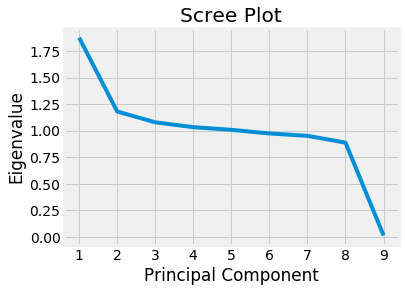

In [19]:
plt.figure()
plt.style.use(['fivethirtyeight'])
plt.title('Scree Plot')
plt.yticks(np.arange(0,2.0,step=0.25))
plt.xticks(np.arange(1,10,step=1))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.plot([1,2,3,4,5,6,7,8,9], sorted_eigvalues)
plt.show()

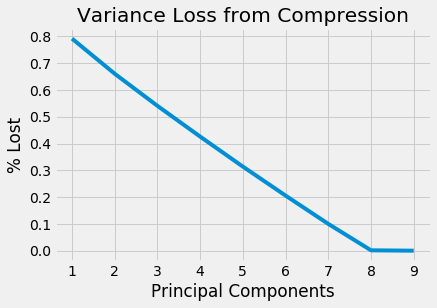

In [20]:
plt.figure()
plt.style.use(['fivethirtyeight'])
plt.title('Variance Loss from Compression')
plt.yticks(np.arange(0,1,step=0.1))
plt.xticks(np.arange(1,10,step=1))
plt.xlabel('Principal Components')
plt.ylabel('% Lost')
plt.plot([1,2,3,4,5,6,7,8,9], variance_lost)
plt.show()

now we need to obtain the eigendecomposition of the covariance matrix where
$\Large \Sigma = \Large PDP^{-1} $ and where D is a diagonal matrix of eigenvalues $\Large D = \begin{bmatrix} \lambda_{1} & ... & 0 \\ ... & ... & ... \\ 0 & ... & \lambda_{n} \end{bmatrix}$ <br> 
 and P is the matrix of eigenvectors of the covariance matrix

In [21]:
D = np.diag(sorted_eigvalues)
D

array([[1.87543368, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.18041789, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.07858209, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.03281654, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.00773096,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.97370436, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.9510846 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.88729529, 0.        ],


In [22]:
P = np.array(sorted_eigvectors)
P_1 = np.linalg.inv(sorted_eigvectors)

In [23]:
P

array([[-6.39232454e-01, -3.75296245e-01, -1.82766695e-01,
        -5.64426351e-02,  1.38343623e-02,  6.52109560e-02,
        -1.21304579e-01, -7.29360141e-02, -6.24072785e-01],
       [-1.80538284e-01,  7.07283580e-01,  2.34606587e-01,
         4.51594439e-01, -2.38382477e-01,  1.05160094e-01,
         3.24369491e-02,  9.28457065e-02, -3.61414923e-01],
       [-1.38785818e-01,  2.28864334e-01,  3.31854675e-01,
        -4.12802572e-01,  3.87138372e-01, -6.40515938e-01,
         7.63873447e-02,  2.39496116e-01, -1.56511734e-01],
       [-3.26027761e-01,  2.50350849e-01, -1.42992927e-02,
        -5.13617068e-01, -4.30483205e-01,  1.39568464e-01,
        -4.91272166e-01,  1.40121362e-01,  3.18191618e-01],
       [-4.57330383e-01,  2.63113469e-01, -1.62484362e-01,
         1.89866452e-01,  4.86060667e-01, -1.34463676e-02,
        -5.57919515e-02, -4.94350649e-01,  4.18615221e-01],
       [-4.50121881e-01, -3.15238235e-01,  2.29939055e-01,
         3.50283559e-01, -1.94033515e-01, -1.404967

In [24]:
# eigendecomposition
P @ D @ P_1

array([[ 1.        , -0.17294794, -0.03468228,  0.36061005,  0.49363871,
         0.53548389, -0.05916887, -0.04504978, -0.02023078],
       [-0.17294794,  1.        , -0.00626363,  0.18883194,  0.25941375,
         0.1868572 , -0.0210527 , -0.02573555, -0.01687507],
       [-0.03468228, -0.00626363,  1.        ,  0.10480621,  0.13907076,
         0.09219357, -0.0457802 , -0.00566669,  0.00608724],
       [ 0.36061005,  0.18883194,  0.10480621,  1.        ,  0.01281684,
        -0.02353184, -0.05503785, -0.0423934 , -0.0325096 ],
       [ 0.49363871,  0.25941375,  0.13907076,  0.01281684,  1.        ,
         0.01455977, -0.01141212, -0.07580404, -0.00615815],
       [ 0.53548389,  0.1868572 ,  0.09219357, -0.02353184,  0.01455977,
         1.        , -0.0684044 ,  0.02045331, -0.00371941],
       [-0.05916887, -0.0210527 , -0.0457802 , -0.05503785, -0.01141212,
        -0.0684044 ,  1.        , -0.00389401, -0.03505752],
       [-0.04504978, -0.02573555, -0.00566669, -0.0423934 , -0

this is equal to the covariance matrix so we have successfully found the eigendecomposition

to find a projection of the original data onto a new feature space we can use $ \Large Z = (P^{T}X^{T})^{T} $

In [25]:
# compress the data
Z = (P.T[0:9] @ X.T)
Z.T

array([[-3.15612325, -0.53082571, -1.47629014, ..., -2.3265919 ,
         0.0696506 ,  0.01000606],
       [-3.06776289,  1.12210325, -0.8776049 , ..., -1.9765253 ,
        -1.22475168,  0.00891413],
       [-1.18249837,  0.203175  ,  0.43945164, ..., -1.2377985 ,
        -0.28947842,  0.02362038],
       ...,
       [-0.45157492,  0.24499425, -0.18697764, ...,  1.20302974,
        -1.36927469,  0.03733372],
       [ 1.19959621, -0.53013028,  0.55462421, ...,  0.25969898,
        -0.79144022,  0.03906435],
       [ 1.2096856 , -0.11910547, -0.99661021, ...,  0.54799332,
        -0.14523343,  0.0433542 ]])

In [26]:
# we can compare this to a low-rank approximation using the Singular Value Decomposition instead of the Eigendecomposition
# the singular values are already ordered so we don't need to sort the eigenvectors in U
U, largeSigma, V = np.linalg.svd(X.T)
Z_svd = (U.T[0:6] @ X.T)
Z_svd.T

array([[-3.15612325e+00,  5.30825713e-01, -1.47629014e+00,
         2.74566388e+00,  2.29941714e+00,  3.87810749e-01],
       [-3.06776289e+00, -1.12210325e+00, -8.77604903e-01,
         2.73510193e+00,  2.07483352e+00,  9.56417974e-01],
       [-1.18249837e+00, -2.03175003e-01,  4.39451639e-01,
         1.73796633e+00,  2.95101962e+00,  1.63947580e-01],
       ...,
       [-4.51574915e-01, -2.44994252e-01, -1.86977644e-01,
        -4.83729479e-01, -1.84269180e-04, -6.81415056e-02],
       [ 1.19959621e+00,  5.30130280e-01,  5.54624209e-01,
         4.47314168e-01, -9.92145463e-01,  9.84087917e-01],
       [ 1.20968560e+00,  1.19105469e-01, -9.96610213e-01,
         3.64605229e-01, -9.01282246e-01,  4.91796972e-01]])

In [27]:
# we can also uncompress the data back into the original feature space
uncompressed_X = P[0:6].T @ P[0:6] @ X.T
uncompressed_X

array([[ 2.54883748,  1.6982427 ,  0.48511783, ...,  0.06237142,
        -0.67902727, -0.52704115],
       [-0.57735375,  0.69641932,  0.48957965, ...,  0.32762813,
        -0.76893642, -0.84362567],
       [-0.08238359,  0.17359622,  0.28082188, ..., -0.26426055,
        -0.20806191, -0.35226995],
       ...,
       [ 1.9781241 ,  1.64055377,  0.6919626 , ..., -0.55423566,
        -0.44863481, -0.16820219],
       [-0.37925694, -0.74084225,  0.37784111, ..., -0.54494412,
         0.08882839, -0.31695851],
       [-0.97838634, -0.9764188 , -0.97930955, ..., -0.98064522,
         1.03566625,  0.02355569]])

Similarly to how we found the amount of variance we would lose with a certain number of principal components, we can use $\Large \sum \limits _{i=M+1} ^{D} \lambda_{i} $ which is equal to the squared reconstruction error $\Large \frac{1}{N} \sum \limits _{n=1} ^{N} ||x_{n} - \tilde x_{n}||^{2} $

In [28]:
reconstruction_error = np.array([])
for i in range(1, len(sorted_eigvalues)+1):
    reconstruction_error = np.append(reconstruction_error, np.sum(sorted_eigvalues[-i:]))

In [29]:
np.sum(sorted_eigvalues[-5:])

3.8327498056714298

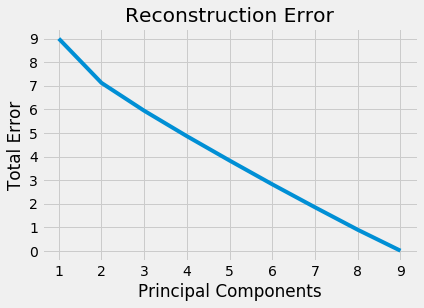

In [30]:
plt.figure()
plt.style.use(['fivethirtyeight'])
plt.title('Reconstruction Error')
plt.yticks(np.arange(0,10,step=1))
plt.xticks(np.arange(1,10,step=1))
plt.xlabel('Principal Components')
plt.ylabel('Total Error')
plt.plot([9,8,7,6,5,4,3,2,1], reconstruction_error)
plt.show()

Now that we've completed the compression let's see if we can extract some useful insights. <br>One drawback of PCA is that because it compresses the data to maximize variance and decrease dimension, it becomes difficult to interpret what the prinipal components actually are in context. Let's see what the first principal component is correlated with in our original data to get a sense of how we can interpret it.

In [31]:
pc1 = pd.DataFrame(Z.T[:, 0], columns = ['PC1'])
for column in games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].columns:
    print('PC1 & {} :'.format(column), pc1['PC1'].corr(games[column]))

PC1 & EV GF : -0.8754063074185892
PC1 & PP GF : -0.24724081396577552
PC1 & SH GF : -0.19006228483924167
PC1 & GFP1 : -0.4464835227817955
PC1 & GFP2 : -0.6262978342599194
PC1 & GFP3 : -0.6164260452115001
PC1 & GAP1 : 0.15710434433752227
PC1 & GAP2 : 0.11616718331331734
PC1 & GAP3 : 0.04573413029301308


So our first principal component is strongly correlated with Even Strength Goals For and moderately correlated with Goals For in Periods 2 & 3. The simplest way to interpret this is just as Even Strength Goals in Periods 2 & 3. This makes sense because Even Strength Goals has the most variance by far in the data.

In [32]:
pc2 = pd.DataFrame(Z.T[:, 1], columns = ['PC2'])
for column in games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].columns:
    print('PC2 & {} :'.format(column), pc2['PC2'].corr(games[column]))

PC2 & EV GF : -0.4077482535769709
PC2 & PP GF : 0.7684426595899517
PC2 & SH GF : 0.24865431938064847
PC2 & GFP1 : 0.27199878154829127
PC2 & GFP2 : 0.285864990548251
PC2 & GFP3 : -0.3424970052494955
PC2 & GAP1 : 0.04072858864461882
PC2 & GAP2 : -0.2650975590234737
PC2 & GAP3 : -0.129939577638079


The second principal component is strongly correlated with Powerplay Goals For. Since this principal component is not strongly correlated with any other variable, we can safely assume it represents PowerPlay Goals For.

In [33]:
pc3 = pd.DataFrame(Z.T[:, 2], columns = ['PC3'])
for column in games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].columns:
    print('PC3 & {} :'.format(column), pc3['PC3'].corr(games[column]))

PC3 & EV GF : -0.1898119975581504
PC3 & PP GF : 0.2436502172134738
PC3 & SH GF : 0.34464703080205394
PC3 & GFP1 : -0.014850502772966076
PC3 & GFP2 : -0.16874781985570123
PC3 & GFP3 : 0.23880276080468485
PC3 & GAP1 : -0.5415230008009757
PC3 & GAP2 : 0.4895819250849124
PC3 & GAP3 : 0.49572748847671927


In [34]:
pc4 = pd.DataFrame(Z.T[:, 3], columns = ['PC4'])
for column in games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].columns:
    print('PC4 & {} :'.format(column), pc4['PC4'].corr(games[column]))

PC4 & EV GF : -0.057361285296984914
PC4 & PP GF : 0.45894450906832474
PC4 & SH GF : -0.41952127242714615
PC4 & GFP1 : -0.5219766076495715
PC4 & GFP2 : 0.19295668418142592
PC4 & GFP3 : 0.35598471145557803
PC4 & GAP1 : 0.36478351540101994
PC4 & GAP2 : 0.26415707041493464
PC4 & GAP3 : 0.060291958372513874


In [35]:
pc5 = pd.DataFrame(Z.T[:, 4], columns = ['PC5'])
for column in games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].columns:
    print('PC5 & {} :'.format(column), pc5['PC5'].corr(games[column]))

PC5 & EV GF : 0.01388773582881149
PC5 & PP GF : -0.23930216535525423
PC5 & SH GF : 0.38863196602892175
PC5 & GFP1 : -0.4321440254312992
PC5 & GFP2 : 0.48793590692346794
PC5 & GFP3 : -0.19478210349758251
PC5 & GAP1 : 0.1541249671054577
PC5 & GAP2 : -0.23998280330642652
PC5 & GAP3 : 0.5050955659348603


The principal components become less and less correlated with our original variables as we move away from the first and interpretability is lost.

In [36]:
pc6 = pd.DataFrame(Z.T[:, 5], columns = ['PC6'])
for column in games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].columns:
    print('PC6 & {} :'.format(column), pc6['PC6'].corr(games[column]))

PC6 & EV GF : 0.0643478624297383
PC6 & PP GF : 0.1037682572557188
PC6 & SH GF : -0.6320384490090033
PC6 & GFP1 : 0.1377212186452926
PC6 & GFP2 : -0.013268399400171616
PC6 & GFP3 : -0.13863724528966023
PC6 & GAP1 : -0.31272220032415354
PC6 & GAP2 : -0.3886394245338018
PC6 & GAP3 : 0.5216550721610701


In [37]:
pc7 = pd.DataFrame(Z.T[:, 6], columns = ['PC7'])
for column in games[['EV GF', 'PP GF', 'SH GF', 'GFP1','GFP2','GFP3','GAP1','GAP2','GAP3']].columns:
    print('PC7 & {} :'.format(column), pc7['PC7'].corr(games[column]))

PC7 & EV GF : -0.11830055091071652
PC7 & PP GF : 0.03163366955495352
PC7 & SH GF : 0.07449566259875777
PC7 & GFP1 : -0.4791061361278549
PC7 & GFP2 : -0.05441030071761914
PC7 & GFP3 : 0.2889340039417272
PC7 & GAP1 : -0.5036740838852861
PC7 & GAP2 : -0.48101216626616555
PC7 & GAP3 : -0.35985131114938224


Now that we' ve tried to interpret a few of our principal components, we can see if the dimensionality reduction will help improve regression results.

In [38]:
PCs = pd.DataFrame(Z[0:2].T, columns = ['PC1','PC2'])
PCs = sm.add_constant(PCs)
Y = games['W']
model = sm.OLS(Y, PCs)
results = model.fit(cov_type = 'HC2')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     400.6
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          2.06e-128
Time:                        23:05:06   Log-Likelihood:                -466.73
No. Observations:                1000   AIC:                             939.5
Df Residuals:                     997   BIC:                             954.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6300      0.012     51.560      0.000       0.606       0.654
PC1           -0.2069      0.007    -27.649      0.000      -0.222      -0.192
PC2            0.0581      0.011      5.458      0.000       0.037       0.079
==============================================================================
Omnibus:                      176.461   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.541
Skew:                          -0.162   Prob(JB):                     5.79e-10
Kurtosis:                       2.043   Cond. No.                         1.37
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

Based on the magnitude of the coefficients, the first principal component has a greater effect than the others.

In [39]:
X_ = games[['EV GF', 'PP GF',  'GFP2', 'GFP3']]
X_ = sm.add_constant(X_)
Y = games['W']
model = sm.OLS(Y, X_)
results = model.fit(cov_type = 'HC2')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     158.5
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          5.77e-105
Time:                        23:05:08   Log-Likelihood:                -506.70
No. Observations:                1000   AIC:                             1023.
Df Residuals:                     995   BIC:                             1048.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6300      0.013     49.496      0.000       0.605       0.655
EV GF          0.2554      0.021     12.266      0.000       0.215       0.296
PP GF          0.1523      0.015      9.949      0.000       0.122       0.182
GFP2          -0.0151      0.018     -0.833      0.405      -0.051       0.020
GFP3           0.0050      0.018      0.280      0.779      -0.030       0.040
==============================================================================
Omnibus:                      259.348   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.679
Skew:                          -0.194   Prob(JB):                     9.89e-12
Kurtosis:                       1.968   Cond. No.                         3.53
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [40]:
X_ = games[['GFP1','GFP2', 'GFP3','GAP1','GAP2','GAP3']]
X_ = sm.add_constant(X_)
Y = games['W']
model = sm.OLS(Y, X_)
results = model.fit(cov_type = 'HC2')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     424.5
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          5.06e-270
Time:                        23:05:09   Log-Likelihood:                -228.85
No. Observations:                1000   AIC:                             471.7
Df Residuals:                     993   BIC:                             506.1
Df Model:                           6                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6300      0.010     65.281      0.000       0.611       0.649
GFP1           0.0903      0.009      9.811      0.000       0.072       0.108
GFP2           0.1326      0.009     14.684      0.000       0.115       0.150
GFP3           0.1619      0.009     17.767      0.000       0.144       0.180
GAP1          -0.1568      0.009    -16.540      0.000      -0.175      -0.138
GAP2          -0.1524      0.010    -15.723      0.000      -0.171      -0.133
GAP3          -0.1751      0.009    -19.496      0.000      -0.193      -0.157
==============================================================================
Omnibus:                      114.723   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.485
Skew:                          -0.108   Prob(JB):                     5.36e-08
Kurtosis:                       2.130   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [41]:
X_ = games[['EV GF', 'SH GF', 'GFP1','GFP2', 'GFP3','GAP1','GAP2','GAP3']]
X_ = sm.add_constant(X_)
Y = games['W']
model = sm.OLS(Y, X_)
results = model.fit(cov_type = 'HC2')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          1.10e-264
Time:                        23:05:10   Log-Likelihood:                -222.60
No. Observations:                1000   AIC:                             463.2
Df Residuals:                     991   BIC:                             507.4
Df Model:                           8                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6300      0.010     65.630      0.000       0.611       0.649
EV GF          0.0575      0.017      3.381      0.001       0.024       0.091
SH GF         -0.0008      0.009     -0.088      0.930      -0.019       0.017
GFP1           0.0692      0.011      6.115      0.000       0.047       0.091
GFP2           0.1051      0.012      8.491      0.000       0.081       0.129
GFP3           0.1311      0.013      9.737      0.000       0.105       0.157
GAP1          -0.1570      0.009    -16.603      0.000      -0.176      -0.138
GAP2          -0.1521      0.010    -15.760      0.000      -0.171      -0.133
GAP3          -0.1749      0.009    -19.585      0.000      -0.192      -0.157
==============================================================================
Omnibus:                      112.319   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.343
Skew:                          -0.141   Prob(JB):                     3.49e-08
Kurtosis:                       2.137   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

Based on the coefficients of this model, Even Strength Goals has the greatest effect while Goals For in Periods 2 & 3 are not statistically significant. This suggests that it doesn't matter in what period goals are scored. It would have been interesting to find that Goals For in Periods 2 & 3 had large effects because that would suggest a strategy of letting the opposing team tire out in the first period and then take advantage of their exhaustion in the 2nd & 3rd. 

All of this basically highlights one of the limits of PCA which is that if the data has very little variance to begin with, PCA will not be very successful in reducing dimension.